# L.pay EDA

Lpay에 초점을 둔 고객들의 데이터 분석

**최종 : Lpay, Not lpay 에 대한 열을 추가해 모든 구매정보에 대해 사용자 demo정보를 합친 데이터프레임 생성**  
**추가할것: Lpay를 사용하는 고객과 사용하지 않는고객의 특성분석**

### 처리한 데이터 목록
- [고객 기본정보](#고객-기본정보)
- [Lpay 제휴사 이용정보](#Lpay별-제휴사-정보)

### Data import
customer number에 대해 정렬해서 불러오기 (customer정보가 없는 상품 분류정보, 점포정보 제외)

In [1]:
import pandas as pd

datapath = '../LPOINT_BIG_COMP/'
demo = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_01_DEMO.csv')).sort_values('cust') #고객 데모, 29913 rows, 중복x
pdde = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_02_PDDE.csv')).sort_values('cust')  #상품 구매정보, 중복 o
copu = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_03_COP_U.csv')).sort_values('cust')  #제휴사 이용정보, 중복x
pdcl = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_04_PD_CLAC.csv')) #상품 분류정보
br = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_05_BR.csv'))  #점포정보
lpay = pd.DataFrame(pd.read_csv(datapath+'LPOINT_BIG_COMP_06_LPAY.csv')).sort_values('cust').rename(columns={'rct_no' : 'lpay_rct_no'})  #엘페이 이용, 중복x

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**데이터 중복 발견, 제거**
- 아예 겹치는 데이터  
    -> 같은 영수증에서 같은 물건을 2번 찍었을 수도 있으니까 제거하지 말자~~
- 영수증 번호만 다르고 이외 모든 정보는 같은 데이터도 포함되어있음. 이건 아직 삭제 안함

In [9]:
pdde[pdde.duplicated()]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
3023029,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1980.0,1
1355776,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
1355775,M000034966,A02357398521,1,A02,A020116,PD0630,20210325,13,19900.0,1
281196,M000136117,A01200428576,1,A01,A010018,PD0640,20210529,14,28000.0,1
659233,M000136117,A01472722473,1,A01,A010015,PD0298,20211211,15,1900.0,1
...,...,...,...,...,...,...,...,...,...,...
2010856,M999962961,A02026047499,1,A02,A020006,PD1331,20210628,17,2500.0,1
2010855,M999962961,A02026047499,1,A02,A020006,PD1331,20210628,17,2500.0,1
1263838,M999962961,A02020225158,1,A02,A020006,PD0321,20210313,21,7480.0,1
2750377,M999962961,A02032159296,1,A02,A020006,PD1160,20211030,20,5000.0,1


In [2]:
b = pdde['rct_no'] == 'A02359645028'
pdde[b]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
3023028,M000034966,A02359645028,1,A02,A020116,PD0228,20211223,19,2380.0,1
3023034,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1980.0,1
3023033,M000034966,A02359645028,1,A02,A020116,PD0218,20211223,19,1980.0,1
3023031,M000034966,A02359645028,1,A02,A020116,PD1064,20211223,19,9500.0,1
3023030,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1200.0,1
3023029,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1980.0,1
3023032,M000034966,A02359645028,1,A02,A020116,PD0228,20211223,19,1980.0,1


In [10]:
#pdde내에 중복되는 데이터 존재
a = pdde['cust'] == 'M000034966'
b = pdde['rct_no'] == 'A02359645028'
c = pdde['buy_am'] == 1980
d = pdde['pd_c'] == 'PD0232'
pdde[a & b & c & d]


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
3023034,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1980.0,1
3023029,M000034966,A02359645028,1,A02,A020116,PD0232,20211223,19,1980.0,1


In [11]:
pdde = pdde.drop_duplicates()
len(pdde)

4144389

**총 구매횟수** 
- pdde, copu : 제휴, 비제휴 구매내역 (lpay 구매내역도 포함되어있음) 각각 4,381,743회(중복 제거 후 : 4,144,389), 248,304회 = 4,630,047 회( 중복 제거후 : 4,392,693 )
    - **살펴보니 pdde 데이터에 중복 있음..**
- lpay : lpay 구매내역으로 353,184회
그런데 lpay는 pdde와 copu에서 엘페이로구매한 내역이라 중복이 있을수도 있음.
- notlpay : lpay로 구매하지 않은 유통사,제휴사 구매정보 ->아님

In [12]:
total_purchase = pd.concat((pdde,copu)).sort_values('cust')
total_purchase

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt
2545277,M000034966,A02358961675,1,A02,A020116,PD1422,20210919,16,3990.0,1.0,NaN
24061,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1.0,NaN
24062,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1.0,NaN
24063,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1.0,NaN
3990607,M000034966,A04003723283,1,A04,A043676,PD1330,20210116,21,10800.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3228894,M999962961,A03071935135,1,A03,A030118,PD1259,20210226,20,5590.0,1.0,NaN
3228895,M999962961,A03071935135,1,A03,A030118,PD1654,20210226,20,3290.0,1.0,NaN
3228896,M999962961,A03071935135,1,A03,A030118,PD0321,20210226,20,4990.0,1.0,NaN
913342,M999962961,A02017919296,1,A02,A020006,PD0611,20210127,17,19900.0,1.0,NaN


**중복 제거후 lpay 구매 여부 추가**
- pdde에서 lpay구매정보와 겹치는 구매는 총 37,571회 
- copu에서 lpay구매정보와 겹치는 구매는 총 21,472회
- 즉 lpay는 총 59,043회 중복됨
- lpay의 총 구매횟수인 353,184회에서 59,043회를 뺀 294,141회가 total purchase에 추가됨
- 4,392,693  + 294,141 = 4,686,834개의 총 구매내역 이어야 하지만, lpay로 구매한 lpay영수증 데이터가 중복되어 늘어남을 확인하게 됨
- 이것은 영수증 번호(rct_no)이 다르지만 dup이 겹쳐 위의 중복제거과정에서 걸러지지 못한 데이터들에 대해 lpay가 중복으로 들어가기 때문
    - 따라서 lpay구매 여부를 합한 총 구매 내역(total_purchase)은 4,689,620

In [13]:
dup = ['cust','cop_c','chnl_dv','de_dt','de_hr','buy_am']

total_purchase = pd.merge(total_purchase, lpay, on = dup, how = 'outer')
total_purchase


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
0,M000034966,A02358961675,1,A02,A020116,PD1422,20210919,16,3990.0,1.0,NaN,NaN
1,M000034966,A02358961675,1,A02,A020116,PD1440,20210919,16,3990.0,1.0,NaN,NaN
2,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,59000.0,1.0,NaN,NaN
3,M000034966,A01016688590,1,A01,A010045,PD0777,20210116,18,19000.0,1.0,NaN,NaN
4,M000034966,A01016688590,1,A01,A010045,PD0796,20210116,18,100.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4689615,M999962961,NaN,2,A06,NaN,NaN,20210406,17,65820.0,NaN,NaN,2.104062e+14
4689616,M999962961,NaN,1,A01,NaN,NaN,20210320,13,108300.0,NaN,NaN,2.103201e+14
4689617,M999962961,NaN,2,A06,NaN,NaN,20210531,19,57350.0,NaN,NaN,2.105312e+14
4689618,M999962961,NaN,2,A06,NaN,NaN,20210515,10,46620.0,NaN,NaN,2.105151e+14


In [14]:
t= pd.concat((total_purchase, lpay))
q=t[t.duplicated(dup)]


In [15]:
q[q.lpay_rct_no.notnull()] #total에서 lpay정보와 중복된것

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
9266,M003673750,A02326732658,1,A02,A020103,PD1334,20210227,21,2800.0,2.0,NaN,2.102272e+14
10477,M003803545,A01388415394,1,A01,A010026,PD0957,20211013,13,10000.0,1.0,NaN,2.110131e+14
19655,M005930833,A01179423714,1,A01,A010014,PD1163,20210515,12,500.0,1.0,NaN,2.105151e+14
19656,M005930833,A01179425419,1,A01,A010014,PD1163,20210515,12,500.0,1.0,NaN,2.105151e+14
19657,M005930833,A01179425419,1,A01,A010014,PD1163,20210515,12,500.0,1.0,NaN,2.105151e+14
...,...,...,...,...,...,...,...,...,...,...,...,...
210088,M999962961,NaN,1,A01,NaN,NaN,20210320,13,108300.0,NaN,NaN,2.103201e+14
134842,M999962961,NaN,2,A06,NaN,NaN,20210531,19,57350.0,NaN,NaN,2.105312e+14
64299,M999962961,NaN,1,A02,NaN,NaN,20211230,16,8000.0,NaN,NaN,2.112302e+14
134843,M999962961,NaN,2,A06,NaN,NaN,20210515,10,46620.0,NaN,NaN,2.105151e+14


In [16]:
a = t['cust'] =='M000419293'
b= t['cop_c'] == 'A01'
c=t['de_dt'] == 20210207
d=t['buy_am'] == 92300.0
t[a & b & c] 
#merge가 아닌 concat했기 때문에 당연히 중복됨

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
518,M000419293,A01042228399,1,A01,A010003,PD0290,20210207,19,92300.0,1.0,NaN,2.102072e+14
77869,M000419293,NaN,1,A01,NaN,NaN,20210207,19,92300.0,NaN,NaN,2.102072e+14


In [18]:
t=total_purchase
nnt = t[t.lpay_rct_no.notnull()]
nnt #그렇다면, merge한것중 lpay정보를 보니 lpay의 수가 원래보다 많아지게 됨

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
450,M000419293,A01118435418,1,A01,A010003,PD1683,20210403,17,20100.0,1.0,NaN,2.104032e+14
451,M000419293,A01118401715,1,A01,A010003,PD1694,20210403,17,15000.0,1.0,NaN,2.104032e+14
452,M000419293,A01256205187,1,A01,A010003,PD1772,20210705,16,63700.0,1.0,NaN,2.107052e+14
455,M000419293,21091914C011821717,2,C01,C010004,NaN,20210919,14,26000.0,NaN,20210920.0,2.109191e+14
464,M000419293,21062910C015935450,2,C01,C010004,NaN,20210629,10,36000.0,NaN,20210630.0,2.106291e+14
...,...,...,...,...,...,...,...,...,...,...,...,...
4689615,M999962961,NaN,2,A06,NaN,NaN,20210406,17,65820.0,NaN,NaN,2.104062e+14
4689616,M999962961,NaN,1,A01,NaN,NaN,20210320,13,108300.0,NaN,NaN,2.103201e+14
4689617,M999962961,NaN,2,A06,NaN,NaN,20210531,19,57350.0,NaN,NaN,2.105312e+14
4689618,M999962961,NaN,2,A06,NaN,NaN,20210515,10,46620.0,NaN,NaN,2.105151e+14


In [19]:
nnt[nnt.duplicated('lpay_rct_no')] #lpay영수증번호가 중복된것들

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
9266,M003673750,A02326732658,1,A02,A020103,PD1334,20210227,21,2800.0,2.0,NaN,2.102272e+14
10477,M003803545,A01388415394,1,A01,A010026,PD0957,20211013,13,10000.0,1.0,NaN,2.110131e+14
19656,M005930833,A01179425419,1,A01,A010014,PD1163,20210515,12,500.0,1.0,NaN,2.105151e+14
19657,M005930833,A01179425419,1,A01,A010014,PD1163,20210515,12,500.0,1.0,NaN,2.105151e+14
19698,M005930833,A01382871363,1,A01,A010014,PD1689,20211009,18,6500.0,1.0,NaN,2.110092e+14
...,...,...,...,...,...,...,...,...,...,...,...,...
4388595,M998574012,E06049253904,2,A06,NaN,PD0507,20211027,19,30000.0,1.0,NaN,2.110272e+14
4388596,M998574012,E06049253904,2,A06,NaN,PD0507,20211027,19,30000.0,1.0,NaN,2.110272e+14
4390284,M998844493,21111720C010940381,2,C01,C010019,NaN,20211117,20,4000.0,NaN,20211121.0,2.111172e+14
4390285,M998844493,21111720C010940381,2,C01,C010019,NaN,20211117,20,4000.0,NaN,20211121.0,2.111172e+14


In [20]:
t
a = t['cust'] =='M003673750'
b= t['cop_c'] == 'A02'
c=t['de_dt'] == 20210227	
d=t['buy_am'] == 2800.0
t[a & b & c&d] 
#구매 사항이 완전히 같은데 영수증 번호가 다름

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,lpay_rct_no
9265,M003673750,A02326724802,1,A02,A020103,PD1334,20210227,21,2800.0,2.0,NaN,2.102272e+14
9266,M003673750,A02326732658,1,A02,A020103,PD1334,20210227,21,2800.0,2.0,NaN,2.102272e+14


In [209]:
pdde[pdde.duplicated(dup+['pd_c','br_c','buy_ct'])] #영수증 번호만 다른 사례

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
614863,M000225114,A01440481075,1,A01,A010011,PD0675,20211116,18,23000.0,1
372989,M000261625,A01266152280,1,A01,A010001,PD1840,20210713,18,64000.0,1
220568,M000350564,A01157314976,1,A01,A010013,PD0797,20210501,13,1112000.0,1
53944,M000494848,A01037722609,1,A01,A010028,PD0336,20210205,15,680000.0,1
671946,M000621637,A01482190648,1,A01,A010015,PD1809,20211218,14,89000.0,1
...,...,...,...,...,...,...,...,...,...,...
88873,M999002436,A01063364804,1,A01,A010004,PD0759,20210223,19,1000.0,1
684730,M999180761,A01491521498,1,A01,A010043,PD0310,20211224,17,34950.0,1
1223895,M999238704,A02118913646,1,A02,A020028,PD0290,20210307,12,900.0,9
4299433,M999340261,A05000012417,1,A05,A050397,PD0416,20210331,14,49500.0,1



- demo : 고객 데모정보  
- pdde : 유통사 상품구매정보
- copu : 제휴사 이용정보  
- lpay : L.pay 이용정보  

**제휴사 정보**  
- A01~06 : 유통사 - pdde 
- B01 : 숙박업종  - copu
- C01~2: 엔터테인먼트  - copu
- D01~2: F&B  - copu
- E01: 렌탈업종  - copu
- L00 : 기타 제휴사  - lpay
- L01 : 비 제휴사  - lpay


### 고객 기본정보
lpay를 사용하는/하지않는 고객의 기본 정보 분석
- 전체 고객 29913명 ( 여성 : 20083, 남성 : 9830 )
- fem : 성별별 고객 총합
- femag : 고객 성별 별 나이분포
- cntnlp : Lpay 비사용 고객별 구매 횟수
- cntlpay : Lpay 사용 고객별 구매 횟수
- paytype : 고객 별 Lpay또는 Lpay비사용 구매 횟수
    - paytype은 총 29756행으로, 전체고객 중 구매 이력이 있는 고객은 29913명
    - cust_both : Lpay사용, 비사용 모두 구매 이력이 있는 고객과 그 횟수 (8788명)
    - cust_nlpay : Lpay를 사용해 본 이력이 없는 고객과 Lpay비사용 구매횟수 (20968명)
    - cust_lpay : Lpay만 사용해 구매한 고객(없음)
- **추가할것:제휴사 별 고객이용정보**

In [4]:
fem = pd.DataFrame(demo.groupby('ma_fem_dv').count().iloc[:,1])
fem

,ages
ma_fem_dv,
남성,9830
여성,20083


In [5]:
femag = demo.iloc[:,1:].pivot_table(index = 'ma_fem_dv',
                columns = 'ages',
                aggfunc = 'count')
femag

zon_hlv                             
ages          20대   30대   40대   50대   60대  70대
ma_fem_dv                                     
남성           1340  2696  3187  1718   636  253
여성           2513  5040  6676  3915  1479  460

In [6]:
cntnlp = pd.DataFrame(notlpay.groupby('cust').count().iloc[:,0]).sort_values('rct_no',ascending=False)
cntnlp.head()

,rct_no
cust,
M057015266,12453
M919374790,10058
M287960590,2579
M763326819,2524
M124357021,2145


In [7]:
cntlpay = pd.DataFrame(lpay.groupby('cust').count().iloc[:,0]).sort_values('rct_no',ascending=False)
cntlpay.head()

,rct_no
cust,
M785169881,1334
M057015266,1183
M682178418,462
M021121027,460
M305938369,387


In [8]:
paytype = pd.merge(cntnlp,cntlpay,on='cust',how='left')
paytype

,rct_no_x,rct_no_y
cust,,
M057015266,12453,1183.0
M919374790,10058,4.0
M287960590,2579,44.0
M763326819,2524,NaN
M124357021,2145,331.0
...,...,...
M548297963,1,5.0
M892684168,1,NaN
M067196954,1,NaN


In [9]:
cust_both = paytype.dropna()
cust_both

,rct_no_x,rct_no_y
cust,,
M057015266,12453,1183.0
M919374790,10058,4.0
M287960590,2579,44.0
M124357021,2145,331.0
M851925709,1924,107.0
...,...,...
M752402179,1,1.0
M365618828,1,1.0
M316453589,1,1.0


In [10]:
cust_nlpay = paytype[paytype['rct_no_y'].isnull()]
cust_nlpay

,rct_no_x,rct_no_y
cust,,
M763326819,2524,NaN
M935231621,1998,NaN
M062470149,1873,NaN
M006407679,1858,NaN
M282063613,1799,NaN
...,...,...
M789724153,1,NaN
M892684168,1,NaN
M067196954,1,NaN


In [11]:
cust_lpay = paytype[paytype['rct_no_x'].isnull()]
cust_lpay 

,rct_no_x,rct_no_y
cust,,


----

### Lpay별 제휴사 정보
- cop_c의 제휴사 정보 중 L01은 비제휴
- custlpay : 고객 별 제휴사마다의 Lpay 이용 금액
- copam : 제휴사 별 Lpay 누적 이용 금액 (L01은 비 제휴사)


**Lpay 기본정보**
- 총 구매횟수 4381743회 (Lpay구매의 12.4배(1240%))
- Lpay 총 구매는 353184회
    - Lpay 중 제휴 구매는 282245회, 비제휴 구매 70939
    
- **추가할것 : 제휴사 별 + Lpay사용 여부 별 고객정보**

In [12]:
totallpay = len(lpay)
totallpay

353184

In [13]:
withoutL01 = lpay[lpay['cop_c']!='L01']
with01 = lpay[lpay['cop_c']=='L01']
print(len(withoutL01), len(with01))

282245 70939


In [14]:
custlpay = lpay[['cop_c','cust','buy_am']].groupby(['cust','cop_c']).sum()
custlpay.head()

buy_am
cust       cop_c        
M000136117 A01    902500
           A06    219901
           D01     15100
M000419293 A01    850700
           A02     83500

<BarContainer object of 14 artists>

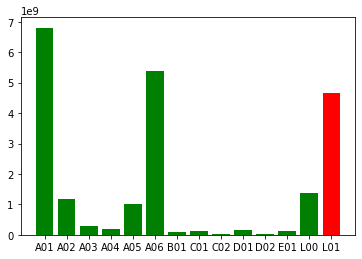

In [15]:
import matplotlib.pyplot as plt
copam = lpay[['cop_c','buy_am']].groupby('cop_c').sum()
x = list(copam.index)
y = list(copam.values.flatten())
c = ['green' for _ in range(len(x)-1)]
c.append('red')
plt.bar(x, y, color = c ) # 제휴사 별 Lpay 구매금액, red는 비 제휴사

In [16]:
lpaydemo = pd.merge(lpay,demo, on ='cust',how = 'right')
lpaydemo

,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am,ma_fem_dv,ages,zon_hlv
0,M000034966,NaN,NaN,NaN,NaN,NaN,NaN,여성,40대,Z07
1,M000059535,NaN,NaN,NaN,NaN,NaN,NaN,여성,30대,Z12
2,M000136117,2.101091e+14,A01,1.0,20210109.0,14.0,902500.0,여성,30대,Z11
3,M000136117,2.111200e+14,A06,2.0,20211120.0,0.0,177301.0,여성,30대,Z11
4,M000136117,2.109262e+14,D01,2.0,20210926.0,22.0,15100.0,여성,30대,Z11
...,...,...,...,...,...,...,...,...,...,...
374186,M999962961,2.103201e+14,A01,1.0,20210320.0,13.0,108300.0,여성,50대,Z17
374187,M999962961,2.105312e+14,A06,2.0,20210531.0,19.0,57350.0,여성,50대,Z17
374188,M999962961,2.112302e+14,A02,1.0,20211230.0,16.0,8000.0,여성,50대,Z17
374189,M999962961,2.105151e+14,A06,2.0,20210515.0,10.0,46620.0,여성,50대,Z17


----

### Demo 이용 Lpay 분석
Lpay를 사용하는 고객과 사용하지 않는 고객의 특성 분석
- lpaydemo : lpay 이용 정보에 고객 demo정보 추가

**demo와 Lpay 데이터프레임 합쳐서 분석**  
- lpay기준 cust가 같은 곳에 demo합치기

In [17]:
lpay['rct_no'].sort_values()

231428    210101000014278
226036    210101000015607
85964     210101000017560
136838    210101000112254
220339    210101000112340
               ...       
63153     211231230649029
62666     211231230649273
62904     211231230649603
62590     211231230649618
62905     211231230650402
Name: rct_no, Length: 353184, dtype: int64